# HEART DISEASE CLASSIFICATION PROBLEM

## Problem Defination
Given certain set of health attributes of given patient predict whether he has heart disease or not.

## Data source

The original data is from the Cleveland data UCI repository:-
https://archive.ics.uci.edu/ml/datasets/heart+disease

A version of it is available on Kaggle:-
    https://www.kaggle.com/ronitf/heart-disease-uci

## Model Success Condition

If wew reach 90% accuracy at predicting whether the patient has heart disease or not then we will pursue the project

## Feautures to be modeled

1.age

2.sex

3.cp-chest pain type (4 values)

4.trestbp-resting blood pressure

5.chol-serum cholestoral in mg/dl

6.fbs-fasting blood sugar > 120 mg/dl

7.restecg-resting electrocardiographic results (values 0,1,2)

8.thalach-maximum heart rate achieved

9.exang-exercise induced angina

10.oldpeak- ST depression induced by exercise relative to rest

11.slope-the slope of the peak exercise ST segment


12.ca-number of major vessels (0-3) colored by flourosopy

13.thal- 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target- have disease(1) or not (0)

## importing the rquired tools

In [1]:
#EDA and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# load data 
df=pd.read_csv('Data/heart-disease.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#chk for dta types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#chk for missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis
1.We have to predict  whether a person has heart disease or not.

2.Since all of the data is in numerical form we dont have to transform it 

3.Since there are no missing values we dont have to impute the missing values

4.we have to check for outliers

5.which features we have to add or remove for improving the model


<AxesSubplot:>

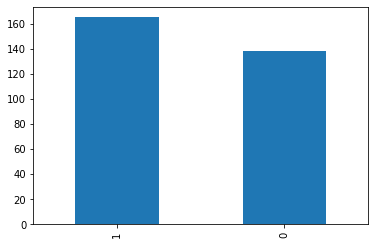

In [5]:
#chk how many values are for each classsification
df['target'].value_counts().plot.bar()

#### Since the number of both classifications are comparable,therefore we can saythat data provided is not biased or faulty

## Comparing different features with target column

###  Sex vs target

In [6]:
df.sex.value_counts() # 1=male 0=female

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Sex vs target
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [8]:
#predictions based on sex 
male=93/207
female=72/96
male,female

(0.4492753623188406, 0.75)

Based on given data a male has 44.92% of having heart disease and a female has 75% chance of having heart disease.

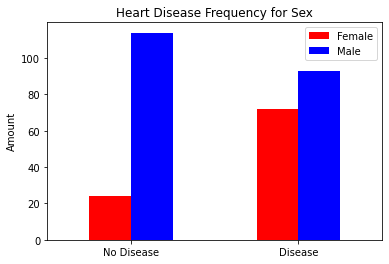

In [9]:
pd.crosstab(df.target,df.sex).plot.bar(color=['red','blue'])
plt.gca().set(title='Heart Disease Frequency for Sex',xlabel='',ylabel='Amount')
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(['No Disease','Disease'])
plt.xticks(rotation=0)
plt.legend(['Female','Male'])

### Age vs Max Heart Rate for heart disease

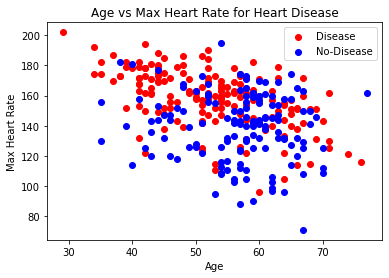

In [10]:
#for positive eg.
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='red',label='Disease')

#fro negative eg.
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='blue',label='No-Disease')
plt.gca().set(title='Age vs Max Heart Rate for Heart Disease',ylabel='Max Heart Rate',xlabel='Age')
plt.legend()

It may be scattered too much but an overall downward pattern is visible

<AxesSubplot:ylabel='Frequency'>

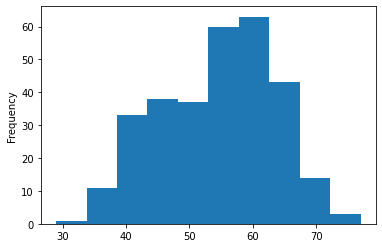

In [11]:
#distribution of age of patients
df.age.plot(kind='hist')

The distribution  of the age is 'Normal'

### Chest pain vs target

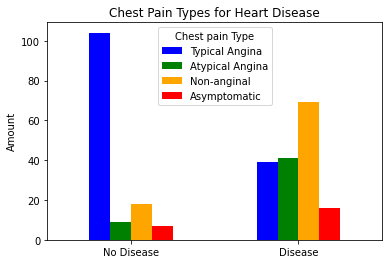

In [12]:
pd.crosstab(df.target,df.cp).plot.bar(color=['blue','green','orange','red'])
plt.gca().set(title='Chest Pain Types for Heart Disease',xlabel='',ylabel='Amount',xticks=[0,1],xticklabels=['No Disease','Disease'])
plt.xticks(rotation=0)
plt.legend(title='Chest pain Type',labels=['Typical Angina','Atypical Angina','Non-anginal','Asymptomatic'])

In [45]:
### Correlation matrix for different indepent attributes
corr_mat=df.corr()

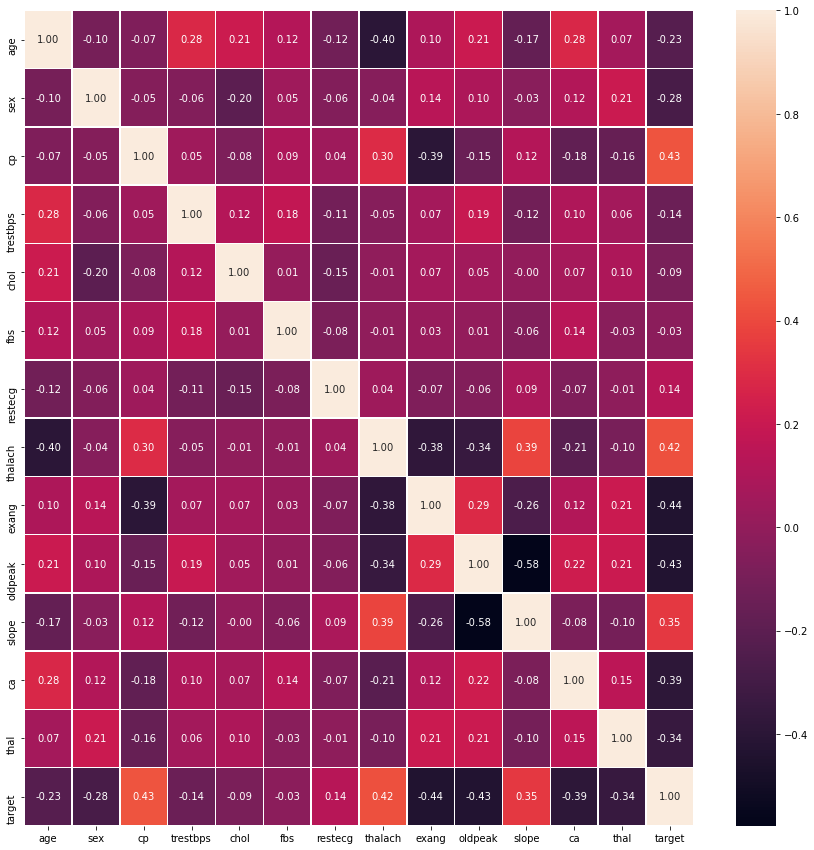

In [46]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_mat,
           annot=True,
              linewidths=0.5,
              fmt='.2f')

### Excercise angina vs Heart disease

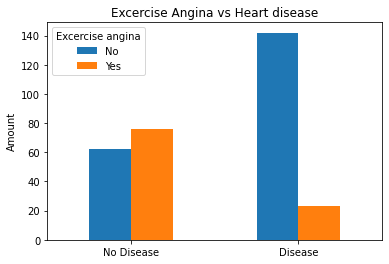

In [62]:
pd.crosstab(df.target,df.exang).plot.bar()
plt.gca().set(title='Excercise Angina vs Heart disease',ylabel='Amount',xlabel='')
plt.xticks([0,1],rotation=0,labels=['No Disease','Disease'])
plt.legend(title='Excercise angina',labels=['No','Yes'])

### Resting ECG vs Heartdisease

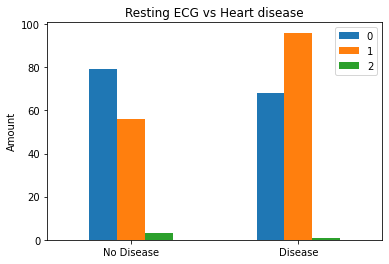

In [64]:
pd.crosstab(df.target,df.restecg).plot.bar()
plt.gca().set(title='Resting ECG vs Heart disease',ylabel='Amount',xlabel='')
plt.xticks([0,1],rotation=0,labels=['No Disease','Disease'])
plt.legend()

# Modelling

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [208]:
#separate features and label
x=df.drop(['target'],axis=1) #features
y=df['target'] #label

np.random.seed(42)
#split in train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### ML to be used
1.Logistic Regression

2.K neighbors classification

3.Random forest classifier

In [74]:
#creating a dictionary of models
models={'Logistic Regression':LogisticRegression(max_iter=1000),
       'K-Neighbors Classifier':KNeighborsClassifier(),
       'Random Forest Classifier':RandomForestClassifier()}

#define a function for training ang scoring a model
def fit_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        scores[name]=model.score(x_test,y_test)
    return scores

In [75]:
fit_score(models,x_train,x_test,y_train,y_test)

{'Logistic Regression': 0.8524590163934426,
 'K-Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

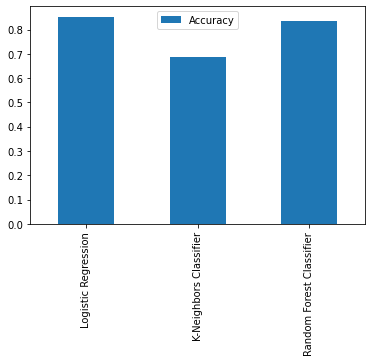

In [79]:
model_compare=pd.DataFrame(fit_score(models,x_train,x_test,y_train,y_test),index=['Accuracy'])
model_compare.T.plot.bar()

#### After getting baseline models,hyperparameeters can be changed further to improve these model

For improving models followwing will e considered:

-Hyperparameters

-Important Featyures

-Confusion matrix

-Cros validation

-Precision

-recall

-f1 score

-classification report

-ROC curve

-AUC 

Since logistic regression and random forest classifier have better scores,
they will be tried to be improved further

### Hyperparameter tuning using GridSearchCV


In [88]:
# parameters grid for logistic regression model
lr_grid={'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
        'solver':['liblinear']}
#parameter grid for RandomForest
rfc_grid={'n_estimators':np.arange(100,1000,100),
         'max_depth':[None,5,10],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[15,20,25]}



In [84]:
#grid seach fro logistic regression
gs_lr_model=GridSearchCV(estimator=LogisticRegression(),
                        param_grid=lr_grid,
                        cv=5,
                        verbose=2)
gs_lr_model.fit(x_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] .

[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear ......

[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............

[CV] .......... C=10000.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV] .......... C=10000.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [85]:
gs_lr_model.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [86]:
gs_lr_model.score(x_test,y_test)

0.8852459016393442

Not much improvement in Logistic regression model but still 88.52% is good

In [90]:
#grid search for random forest model
gs_rf_model=GridSearchCV(estimator=RandomForestClassifier(n_jobs=3),
                        param_grid=rfc_grid,
                        cv=5,
                        verbose=1)
gs_rf_model.fit(x_train,y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  9.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=3),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             verbose=1)

In [91]:
gs_rf_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 4,
 'n_estimators': 100}

In [92]:
gs_rf_model.score(x_test,y_test)

0.8688524590163934

The RandomForest model got improved but still couldnt surpass the logistic regression model
hence The logistic Regression model seems good and further evaluation will be done using Logistic regression model

Further tuning may improve the Logistic regression model


In [94]:
lr_grid={'penalty':['l1','l2',None],
    'C':np.logspace(-2,2,20),
        'solver':['liblinear','lbfgs'],
        'max_iter':[200,500,1000]}
gs_lr_model2=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=lr_grid,
                         cv=5,
                         verbose=1)
gs_lr_model2.fit(x_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed.

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed.

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Classification_Project_heart disease\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                         'max_iter': [200, 500, 1000],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=1)

In [95]:
gs_lr_model2.best_params_

{'C': 0.18329807108324356, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [96]:
gs_lr_model.score(x_test,y_test)

0.8852459016393442

Seems like Logistic regression model can get 88.524% accuracy at best for given data

It is very close to required accuracy of 90%.
More data maybe required to achieve accuracy>90%.

In [100]:
#saving the current model 
import pickle
pickle.dump(gs_lr_model2,open('Models/LogRegModel.pkl','wb'))

In [101]:
#saving other models
pickle.dump(gs_rf_model,open('Models/RandForModel.pkl','wb'))

## Important features Considered in Logistic Regression Model used

In [106]:
gs_lr_model2.best_params_

{'C': 0.18329807108324356, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [109]:
clf=LogisticRegression(C=0.18329807108324356, max_iter= 1000, penalty= 'l2', solver= 'lbfgs')
clf.fit(x_train,y_train)

LogisticRegression(C=0.18329807108324356, max_iter=1000)

In [111]:
clf.score(x_test,y_test)

0.8852459016393442

In [117]:
Feature_imp=pd.Series(clf.coef_[0],index=x.columns)

<AxesSubplot:>

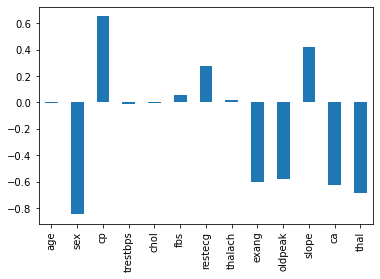

In [122]:
Feature_imp.plot.bar()

From the graph it can be seen that sex,trestbps,chol,fbs,thalach have ver=y less importance in afecting the target

1. Sex has negative correlation it means that wwhne sex is female(0) probability of having disease(1) is higher and vice versa.Similarly,
    exang,oldpeak,ca,thal also have negative relationship with Target.
2. cp,restecg,slope have positive relationship with target.

## Model evaluation


For model evaluation we will use accuracy,recall, precison ,f1 scores with crossval and plot a roc curve as well make a confusion matrix

In [209]:
np.random.seed(42)
clf=LogisticRegression(C=0.18329807108324356, max_iter= 1000, penalty= 'l2', solver= 'lbfgs')
scores={'Accuracy':cross_val_score(clf,x,y,cv=5,scoring='accuracy').mean()*100,
        'Precision':cross_val_score(clf,x,y,cv=5,scoring='precision').mean()*100,
        'Recall':cross_val_score(clf,x,y,cv=5,scoring='recall').mean()*100,
        'F1':cross_val_score(clf,x,y,cv=5,scoring='f1').mean()*100,
       }

In [210]:
scores

{'Accuracy': 83.47540983606557,
 'Precision': 81.43977591036415,
 'Recall': 90.90909090909092,
 'F1': 85.81674363006115}

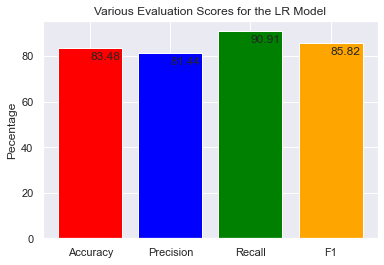

In [211]:
plt.bar(x=scores.keys(),height=scores.values(),color=['red','blue','green','orange'])
plt.gca().set(title='Various Evaluation Scores for the LR Model',ylabel='Pecentage')
for X,Y in scores.items():
    plt.annotate(str(round(Y,2)),(X,Y-5))

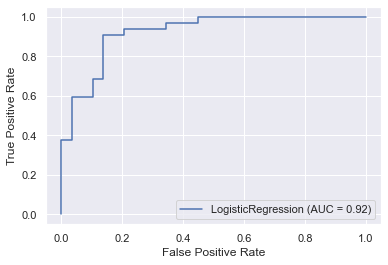

In [190]:
#plot a a roc curve and gettirn auc score
plot_roc_curve(clf,x_test,y_test)

An AUC score of 0.92 is good.

In [183]:
#Making a confusion matrix
cm=confusion_matrix(y_test,clf.predict(x_test))

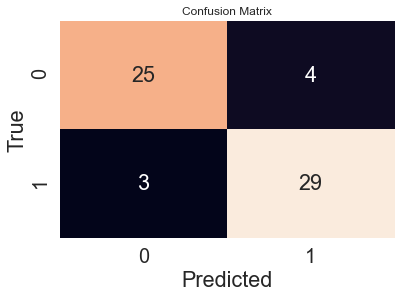

In [189]:
#plotting a confusion matrix
sns.heatmap(cm,
           annot=True,
           cbar=False,
         )
sns.set(font_scale=1)
plt.gca().set(title='Confusion Matrix',ylabel='True',xlabel='Predicted');

# Project review and summary

Problem Definition- For a given set of data about a patient predict he/she has heart disease or not.

Evaluation Success-For the success of experiment a model had to reach an accuracy score of 90%.

Summary-

We used dataset from Cleveland Uci repository.Then we tried Various Classiication models until we got the suitable model for the problem given with high accuracy score in baseline models.
Logistic Regression Model And Random Forest models were selected.These models wwere further tuned for improving them and in end the Logistic Regression model seemed to work better.
So further improvement was done on Logistic regression Model. The model reached an Accuracy score of 88.5 %.
But after cross validation the score fell to 83.5%.
    Hence it can be concluded that for model to work better more data is necessary.Use of another model can also be considered.